In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from IPython.core.display import display
from tqdm import tqdm_notebook as tqdm
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
with open('train_cv_pred.pkl', 'rb') as f:
    pred = pickle.load(f)
df = pd.read_csv('train_data_idx.csv', dtype=int)

with open('user_split.pkl', 'rb') as f:
    cv = pickle.load(f)

list_cv = []
user_ids = df['user_id']

for train, test in cv[:1]:
    trn = user_ids.isin(train)
    val = user_ids.isin(test)
    
df_trn = df.loc[trn, :].copy()
df_val = df.loc[val, :].copy()

df_test = pd.read_csv('test_data_idx.csv', dtype=int)

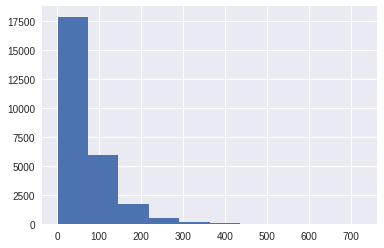

In [3]:
df_val.groupby('user_id')['user_id'].count().hist()

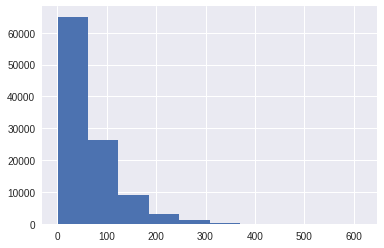

In [4]:
df_trn.groupby('user_id')['user_id'].count().hist()

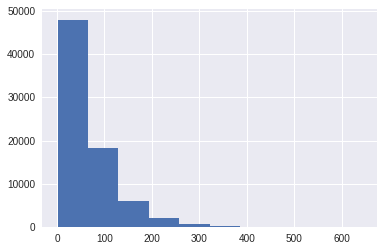

In [5]:
df_test.groupby('user_id')['user_id'].count().hist()

In [8]:
df.sort_values('user_id')

,order_id,user_id
484425,1187899,1
484424,1187899,1
484426,1187899,1
484423,1187899,1
484422,1187899,1
484430,1187899,1
484428,1187899,1
484427,1187899,1
484429,1187899,1
484420,1187899,1


In [3]:
df = pd.read_csv("df_train.csv", usecols=['user_id', 'order_id'])
order_products_train_df.groupby('order_id')['user_id'].agg(['count', 'max', 'min'])

KeyError: 'Column not found: user_id'

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [3]:
order_products_train_df = pd.read_csv("../input/order_products__train.csv")
order_products_prior_df = pd.read_csv("../input/order_products__prior.csv")
orders_df = pd.read_csv("../input/orders.csv")
products_df = pd.read_csv("../input/products.csv")
aisles_df = pd.read_csv("../input/aisles.csv")
departments_df = pd.read_csv("../input/departments.csv")

In [28]:
display(orders_df[orders_df['user_id'] == 1])
display(orders_df[orders_df['user_id'] == 3])

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [7]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
df_train = pd.merge(order_products_train_df, orders_df, how='left', on='order_id')
df_train = pd.merge(df_train, products_df, how='left', on='product_id')
df_train = pd.merge(df_train, aisles_df, how='left', on='aisle_id')
df_train = pd.merge(df_train, departments_df, how='left', on='department_id')
print(df_train.shape)
df_train.to_csv('../input/df_train.csv', index=False)
df_train.head()

(1384617, 15)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [23]:
df_train[df_train['user_id'] == 1]

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
484420,1187899,196,1,1,1,train,11,4,8,14.0
484421,1187899,25133,2,1,1,train,11,4,8,14.0
484422,1187899,38928,3,1,1,train,11,4,8,14.0
484423,1187899,26405,4,1,1,train,11,4,8,14.0
484424,1187899,39657,5,1,1,train,11,4,8,14.0
484425,1187899,10258,6,1,1,train,11,4,8,14.0
484426,1187899,13032,7,1,1,train,11,4,8,14.0
484427,1187899,26088,8,1,1,train,11,4,8,14.0
484428,1187899,27845,9,0,1,train,11,4,8,14.0
484429,1187899,49235,10,1,1,train,11,4,8,14.0


In [5]:
df_prior = pd.merge(order_products_prior_df, orders_df, how='left', on='order_id')
df_prior = pd.merge(df_prior, products_df, how='left', on='product_id')
df_prior = pd.merge(df_prior, aisles_df, how='left', on='aisle_id')
df_prior = pd.merge(df_prior, departments_df, how='left', on='department_id')
print(df_prior.shape)
df_prior.to_csv('../input/df_prior.csv', index=False)
df_prior.head()

(32434489, 15)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [36]:
df_prior[df_prior['user_id'] == 1].sort_values('order_number')

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
24076668,2539329,26405,5,0,1,prior,1,2,8,NaN
24076667,2539329,26088,4,0,1,prior,1,2,8,NaN
24076666,2539329,12427,3,0,1,prior,1,2,8,NaN
24076665,2539329,14084,2,0,1,prior,1,2,8,NaN
24076664,2539329,196,1,0,1,prior,1,2,8,NaN
22742744,2398795,196,1,1,1,prior,2,3,7,15.0
22742749,2398795,13032,6,0,1,prior,2,3,7,15.0
22742748,2398795,26088,5,1,1,prior,2,3,7,15.0
22742745,2398795,10258,2,0,1,prior,2,3,7,15.0
22742746,2398795,12427,3,1,1,prior,2,3,7,15.0


In [5]:
#_df = pd.read_csv('../data/dmt_train_only_rebuy/data000000000000.csv.gz')
import pickle
with open('train_all.pkl', 'rb') as f:
    _df = pickle.load(f)[0].head()
df = _df.head()

In [6]:
df.columns.values

array(['o_order_number', 'o_order_dow', 'o_order_hour_of_day',
       'o_days_since_prior_order', 'u_u1_user_item_cnt',
       'u_u1_user_prd_cnt', 'u_u1_user_depart_cnt', 'u_u1_user_aisle_cnt',
       'u_u1_user_order_cnt', 'u_u1_user_order_rate',
       'u_u1_max_order_number', 'u_u1_avg_days_since_prior_order',
       'u_u1_max_days_since_prior_order',
       'u_u1_min_days_since_prior_order', 'u_u1_avg_reordered',
       'u_u2_order_dow_0', 'u_u2_order_dow_1', 'u_u2_order_dow_2',
       'u_u2_order_dow_3', 'u_u2_order_dow_4', 'u_u2_order_dow_5',
       'u_u2_order_dow_6', 'u_u2_reorder_dow_0', 'u_u2_reorder_dow_1',
       'u_u2_reorder_dow_2', 'u_u2_reorder_dow_3', 'u_u2_reorder_dow_4',
       'u_u2_reorder_dow_5', 'u_u2_reorder_dow_6',
       'u_u3_order_hour_of_day_0', 'u_u3_order_hour_of_day_1',
       'u_u3_order_hour_of_day_2', 'u_u3_order_hour_of_day_3',
       'u_u3_order_hour_of_day_4', 'u_u3_order_hour_of_day_5',
       'u_u3_order_hour_of_day_6', 'u_u3_order_hour_of_day_7

In [29]:
df = _df.head()

import re

target = df['target'].values
df.drop('target', axis=1, inplace=True)

id_cols = [col for col in df.columns.values if re.search('_id$', col) is not None]
df.drop(id_cols, axis=1, inplace=True)

cum_cols = [col for col in df.columns.values if re.search('cum', col) is not None]
df['since_last_order'] = df['o_cum_days'] - df['l_cum_days']
df['since_last_aisle'] = df['o_cum_days'] - df['la_cum_days']
df.drop(cum_cols, axis=1, inplace=True)

def normarize(col_name):
    cols = [col for col in df.columns.values if re.search(col_name, col) is not None]
    row_sum = df[cols].sum(axis=1)
    for col in cols:
        df[col] /= row_sum

cols = [col for col in df.columns.values if re.search('u3_order_hour_of_day', col) is not None]
row_sum = df[cols].sum(axis=1)
for col in cols:
    df[col] /= row_sum

normarize('u2_order_dow')
normarize('u3_order_hour_of_day')
normarize('u4_department_id')

normarize('i2_order_dow')
normarize('i3_order_hour_of_day')
normarize('i4_department_id')

df.T

,0,1,2,3,4
o_order_number,62.000000,14.000000,31.000000,67.000000,41.000000
o_order_dow,5.000000,6.000000,5.000000,6.000000,6.000000
o_order_hour_of_day,10.000000,8.000000,16.000000,17.000000,14.000000
o_days_since_prior_order,6.000000,30.000000,2.000000,4.000000,7.000000
u_u1_user_item_cnt,854.000000,72.000000,485.000000,743.000000,485.000000
u_u1_user_order_cnt,61.000000,13.000000,30.000000,66.000000,40.000000
u_u1_max_order_number,61.000000,13.000000,30.000000,66.000000,40.000000
u_u1_avg_days_since_prior_order,5.662708,13.833333,12.974468,6.398649,9.882845
u_u1_avg_reordered,0.827869,0.291667,0.752577,0.570659,0.762887
u_u2_order_dow_0,0.103044,0.000000,0.129897,0.086137,0.016495


In [40]:
import networkx as nx                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                                                
G = nx.Graph()
edges = [tuple(x) for x in df_prior[['user_id', 'product_name']].values]                                                                                                                                                                                                               
G.add_edges_from(edges)

In [57]:
map_user_item = {}
for user_id in tqdm(df_prior['user_id'].unique()):
    tmp = []
    for item_id in G[user_id]:
        for user_id2 in G[item_id]:
            for item_id2 in G[user_id2]:
                tmp.append(item_id2)
    map_user_item[user_id] = set(tmp)

KeyboardInterrupt: 

In [3]:
df = pd.read_csv('../input/df_prior.csv', usecols=['user_id', 'product_id'])

In [6]:
tmp = df.groupby(['user_id', 'product_id'])['user_id'].count()

In [11]:
tmp.name = 'score'

In [14]:
tmp.reset_index().to_csv('../input/user_item_cnt.csv', index=False)